In [1]:
import numpy as np
import pandas as pd

In [5]:
kidney = pd.read_csv('chronic_kidney_disease_preprocessed.csv')

In [6]:
kidney = kidney.drop('id', axis=1)

In [7]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
392,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
393,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
394,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


In [11]:
# Separate the features and target variable
X = kidney.drop('class', axis=1)
y = kidney['class']

Metrics for Random Forest:
Accuracy: 0.97
Precision: 1.00
Recall: 0.93
F1 Score: 0.96
Confusion Matrix:
[[53  0]
 [ 2 25]]




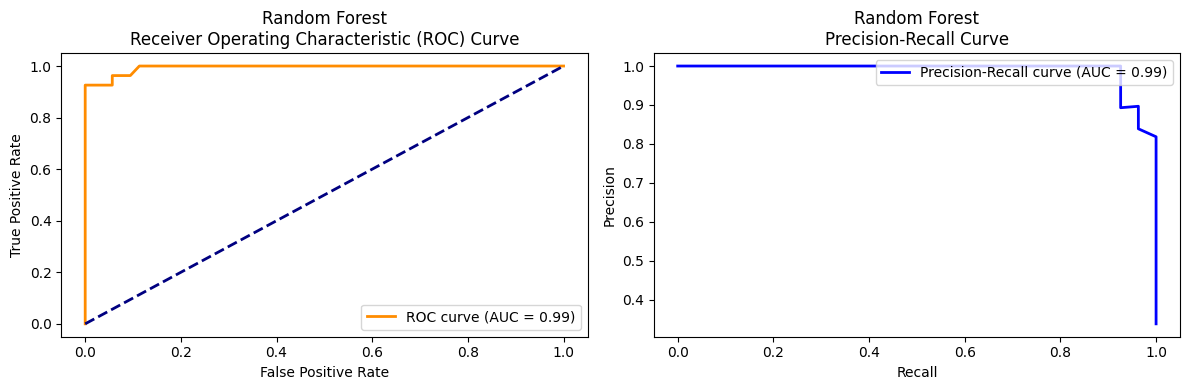

Metrics for Decision Tree:
Accuracy: 0.94
Precision: 0.89
Recall: 0.93
F1 Score: 0.91
Confusion Matrix:
[[50  3]
 [ 2 25]]




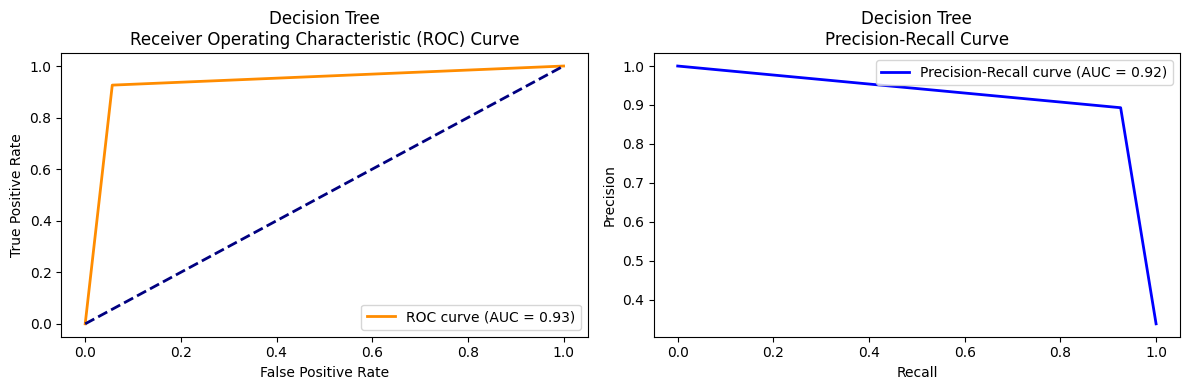

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Function to evaluate and print metrics
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f"Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print("\n")

# Function to plot ROC and Precision-Recall curves
def plot_curves(y_true, y_probs, title):
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    precision, recall, _ = precision_recall_curve(y_true, y_probs)

    # Plot ROC curve
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title}\nReceiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = {:.2f})'.format(auc(recall, precision)))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{title}\nPrecision-Recall Curve')
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature selection using SelectKBest with ANOVA F-statistic
k_best = 10  # Adjust the number of features you want to select

selector = SelectKBest(f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train Random Forest with selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# Train Decision Tree with selected features
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train)
y_pred_dt = dt_model.predict(X_test_selected)

# Evaluate and visualize Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)
plot_curves(y_test, rf_model.predict_proba(X_test_selected)[:, 1], 'Random Forest')

# Evaluate and visualize Decision Tree
evaluate_model("Decision Tree", y_test, y_pred_dt)
plot_curves(y_test, dt_model.predict_proba(X_test_selected)[:, 1], 'Decision Tree')


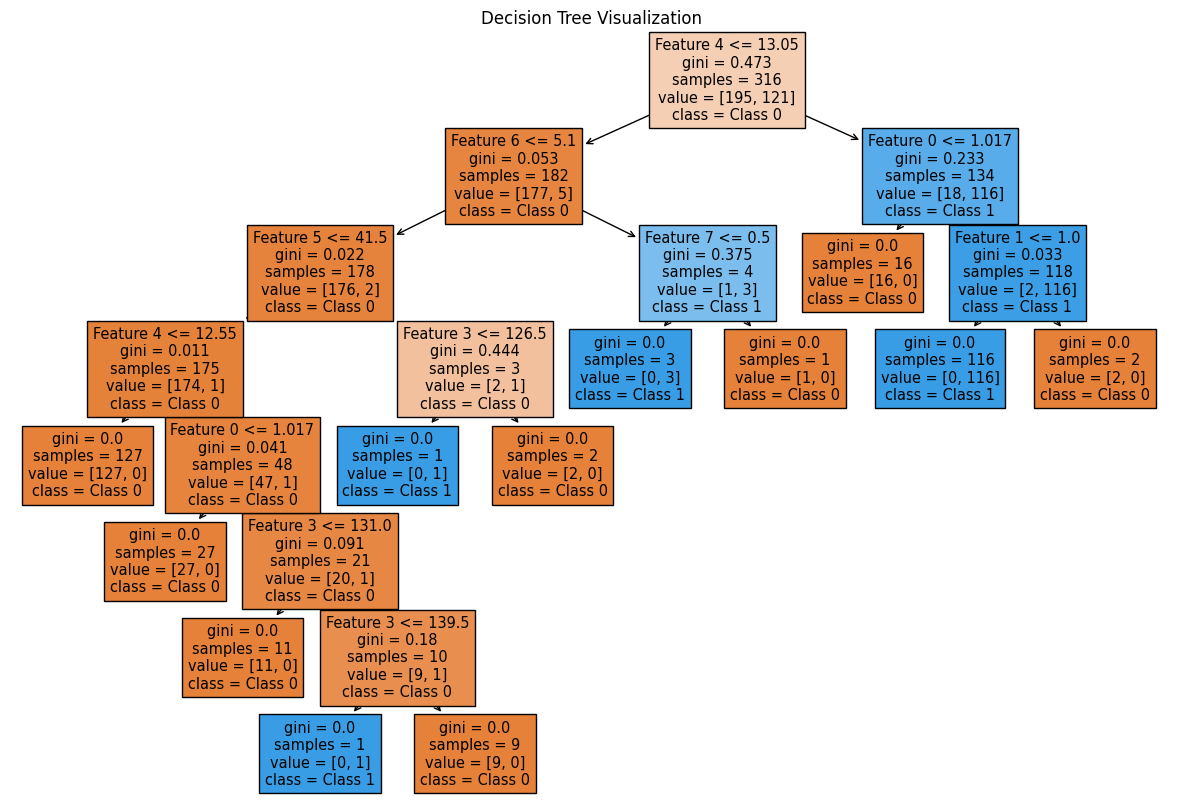

Metrics for Decision Tree:
Accuracy: 0.94
Precision: 0.89
Recall: 0.93
F1 Score: 0.91
Confusion Matrix:
[[50  3]
 [ 2 25]]




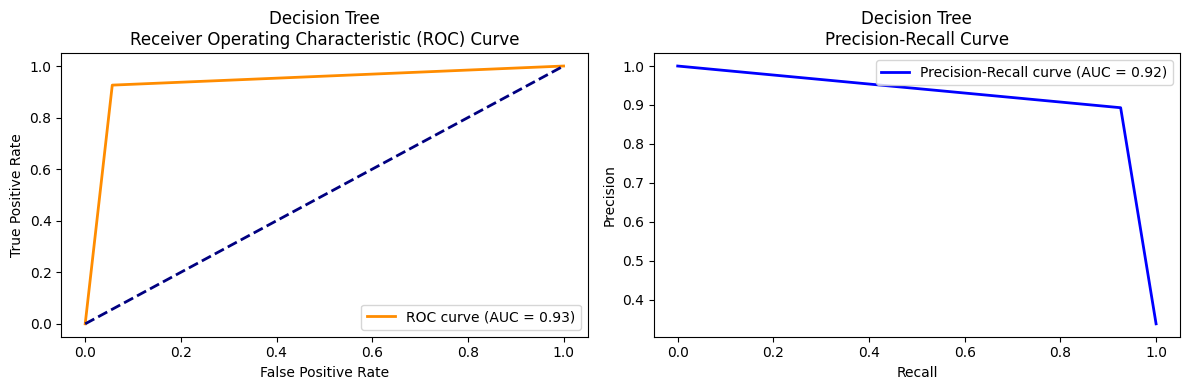

In [13]:
from sklearn.tree import plot_tree


# Train Decision Tree with selected features
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_selected, y_train)
y_pred_dt = dt_model.predict(X_test_selected)

# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=[f'Feature {i}' for i in range(X_train_selected.shape[1])], class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Visualization')
plt.show()

# Evaluate and visualize Decision Tree
evaluate_model("Decision Tree", y_test, y_pred_dt)
plot_curves(y_test, dt_model.predict_proba(X_test_selected)[:, 1], 'Decision Tree')


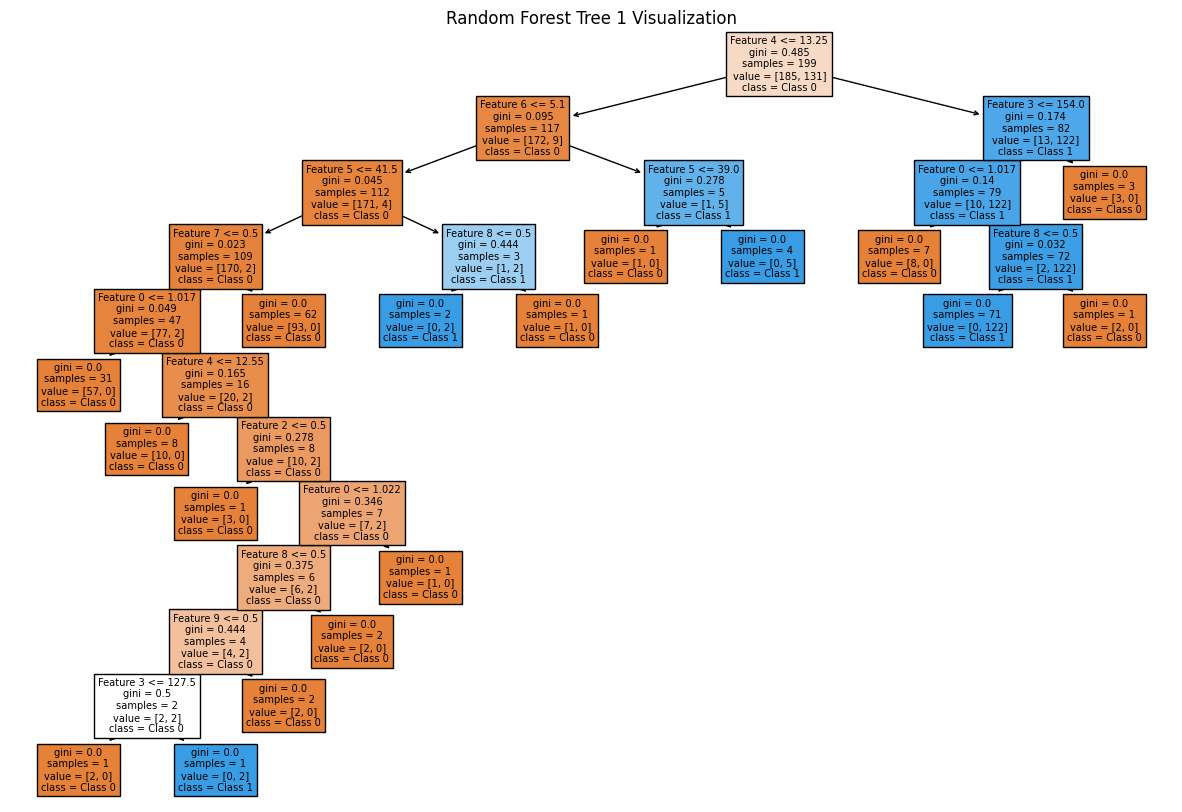

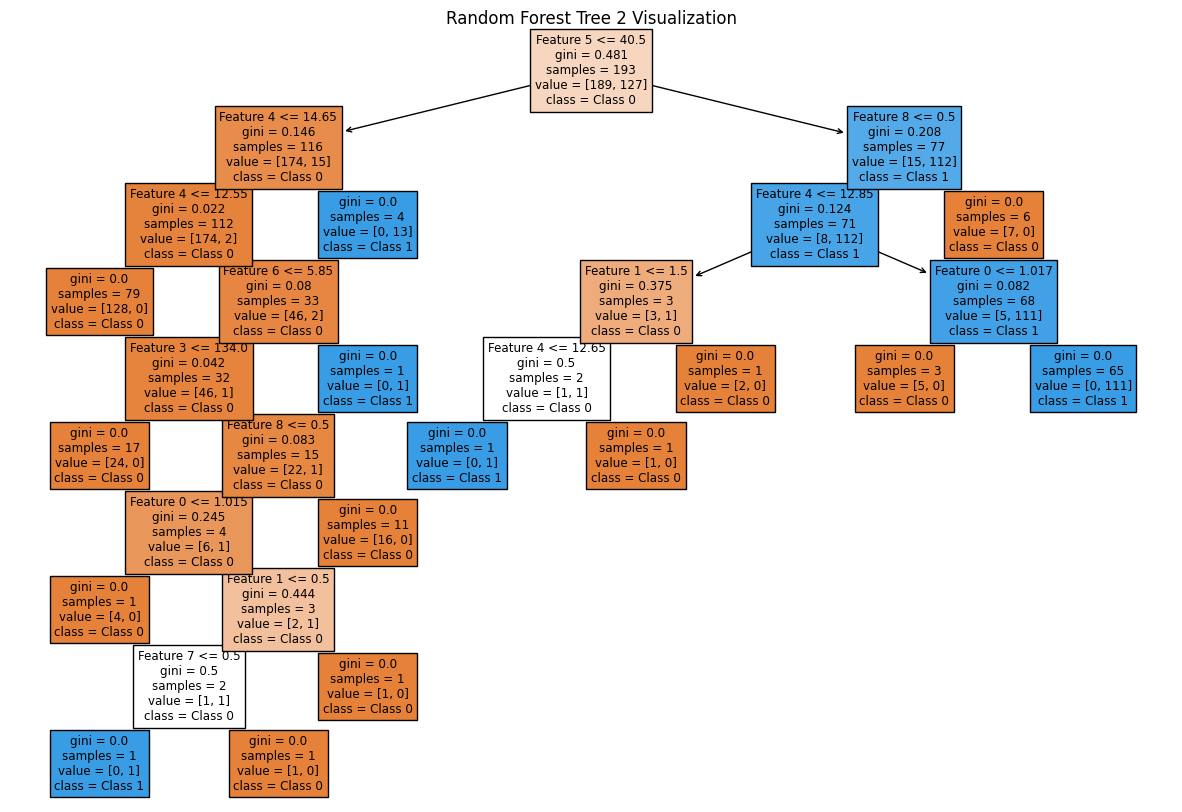

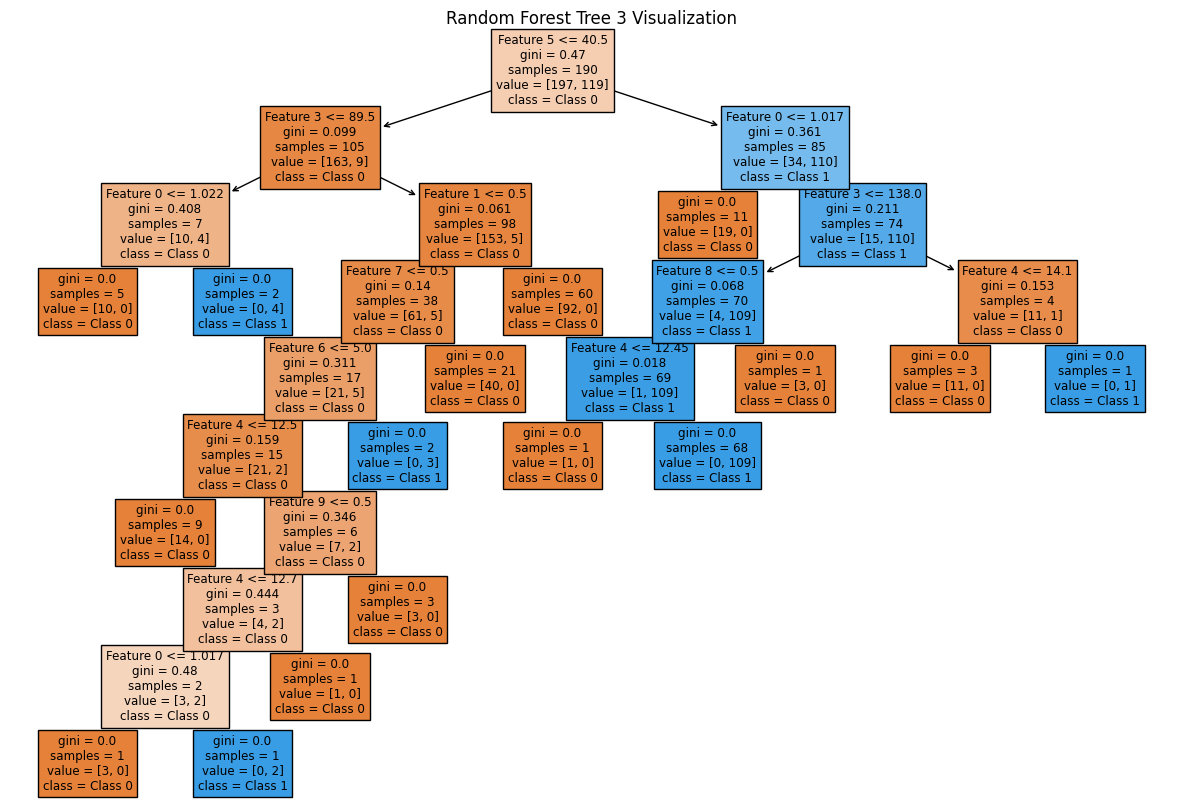

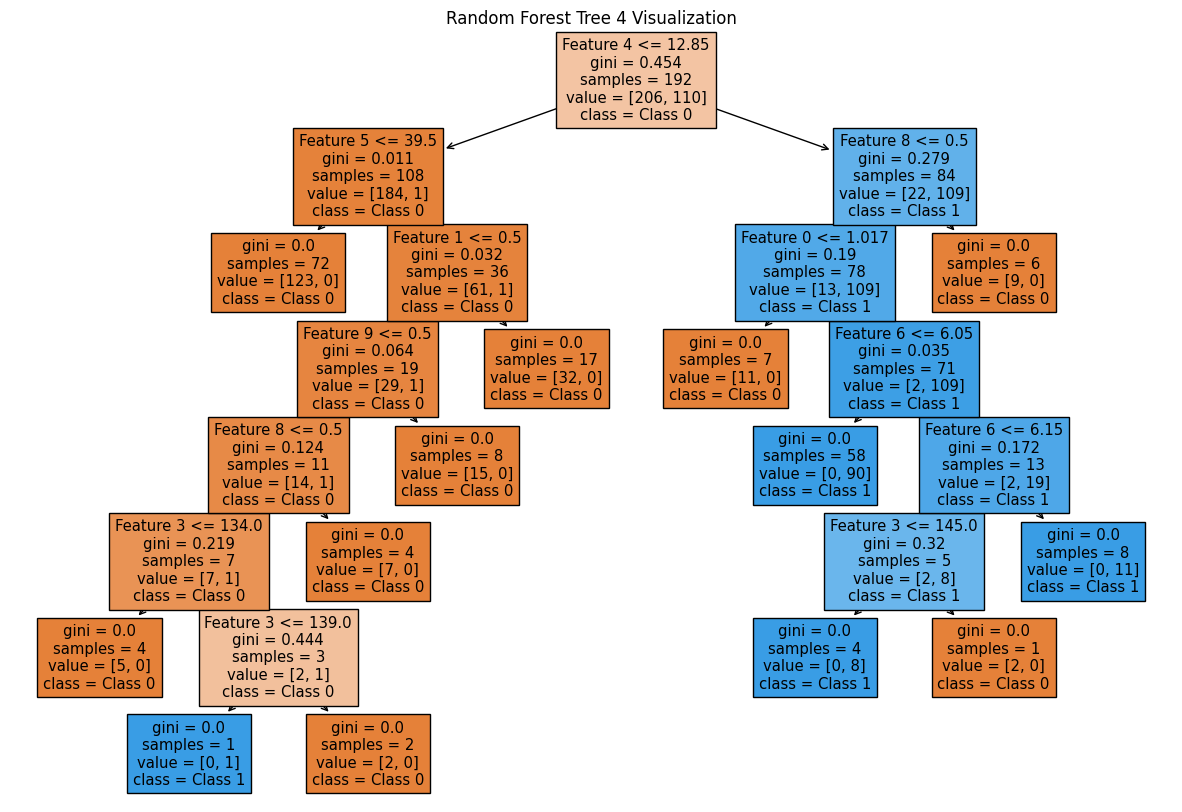

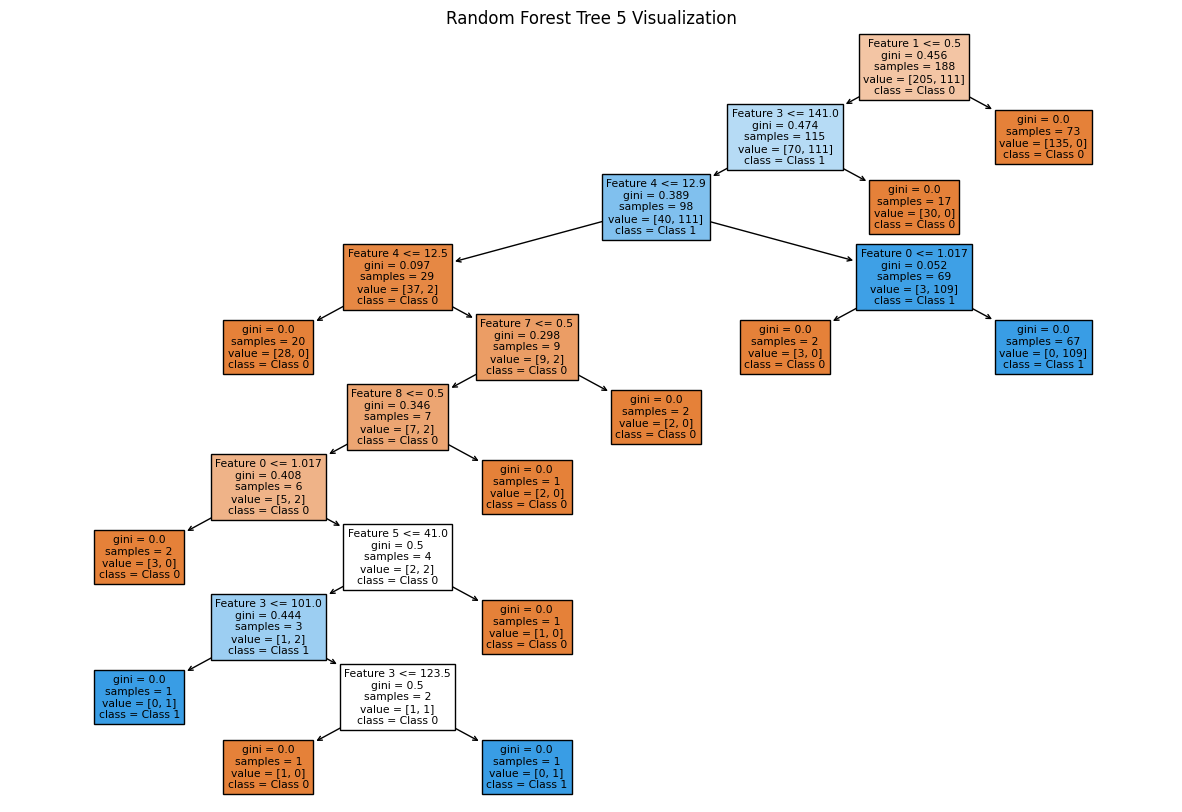

Metrics for Random Forest:
Accuracy: 0.97
Precision: 1.00
Recall: 0.93
F1 Score: 0.96
Confusion Matrix:
[[53  0]
 [ 2 25]]




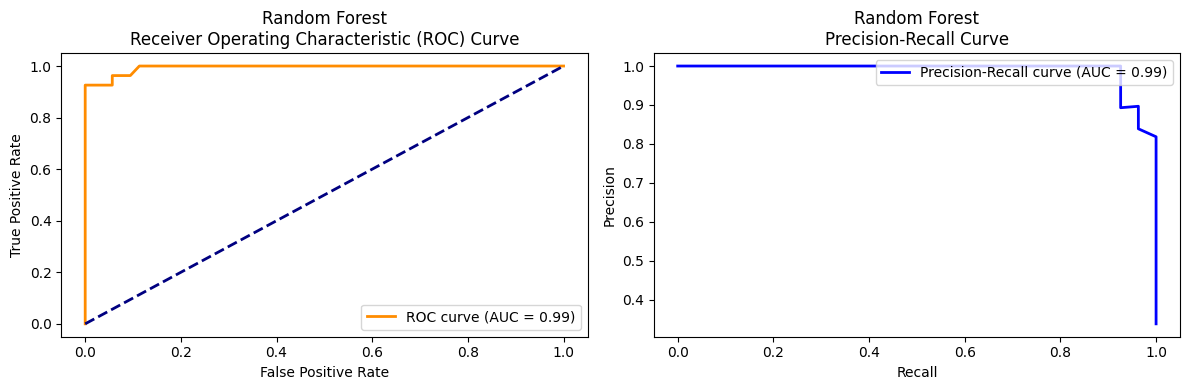

In [14]:
from sklearn.tree import plot_tree

# ...

# Train Random Forest with selected features
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred_rf = rf_model.predict(X_test_selected)

# Visualize each tree in the Random Forest
n_trees_to_visualize = 5  # Choose the number of trees to visualize (adjust as needed)

for i in range(min(n_trees_to_visualize, len(rf_model.estimators_))):
    plt.figure(figsize=(15, 10))
    plot_tree(rf_model.estimators_[i], filled=True, feature_names=[f'Feature {i}' for i in range(X_train_selected.shape[1])], class_names=['Class 0', 'Class 1'])
    plt.title(f'Random Forest Tree {i + 1} Visualization')
    plt.show()

# Evaluate and visualize Random Forest
evaluate_model("Random Forest", y_test, y_pred_rf)
plot_curves(y_test, rf_model.predict_proba(X_test_selected)[:, 1], 'Random Forest')
